In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [203]:
data = pd.read_csv("/content/housing.csv")

print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [204]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [205]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)

<ipython-input-205-698cf60d9210>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)


In [206]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [207]:
label_encoder = LabelEncoder()

# encoding the ocean_proximity column
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

# printing the mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print(data['ocean_proximity'].head())


{'<1H OCEAN': 0, 'INLAND': 1, 'ISLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4}
0    3
1    3
2    3
3    3
4    3
Name: ocean_proximity, dtype: int64


Removing outliers using the IQR method

In [208]:
# selecing numerical features (columns) only 'e7tyaty'
numerical_features = data.select_dtypes(include=np.number).columns


# calculating IQR
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# filter out rows with outliers based on numerical features
data = data[~((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [219]:
# scaling essintial for knn
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [210]:
print(data.head()) #unrealistic values due to scaling

In [211]:
X = data.drop('median_house_value', axis=1) # features
y = data['median_house_value'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [212]:
# linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("linear Regression:")
print(f"Mean Squared Error: {mse_lin}")
print(f"Mean Absolute Error: {mae_lin}")
print(f"R^2 Score: {r2_lin}")

linear Regression:
Mean Squared Error: 0.38805584985358194
Mean Absolute Error: 0.4494930598548049
R^2 Score: 0.620661177958122


In [213]:
# KNN
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)


y_pred_knn = knn_reg.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression:")
print(f"Mean Squared Error: {mse_knn}")
print(f"Mean Absolute Error: {mae_knn}")
print(f"R^2 Score: {r2_knn}")

KNN Regression:
Mean Squared Error: 0.31098885015583044
Mean Absolute Error: 0.38105216705174
R^2 Score: 0.6959969959716306


In [214]:
# comparison dataframe
metrics = {
    "Model": ["Linear Regression", "KNN Regression"],
    "Mean Squared Error": [mse_lin, mse_knn],
    "Mean Absolute Error": [mae_lin, mae_knn],
    "R^2 Score": [r2_lin, r2_knn],
}

comparison_df = pd.DataFrame(metrics)
print(comparison_df)


               Model  Mean Squared Error  Mean Absolute Error  R^2 Score
0  Linear Regression            0.388056             0.449493   0.620661
1     KNN Regression            0.310989             0.381052   0.695997


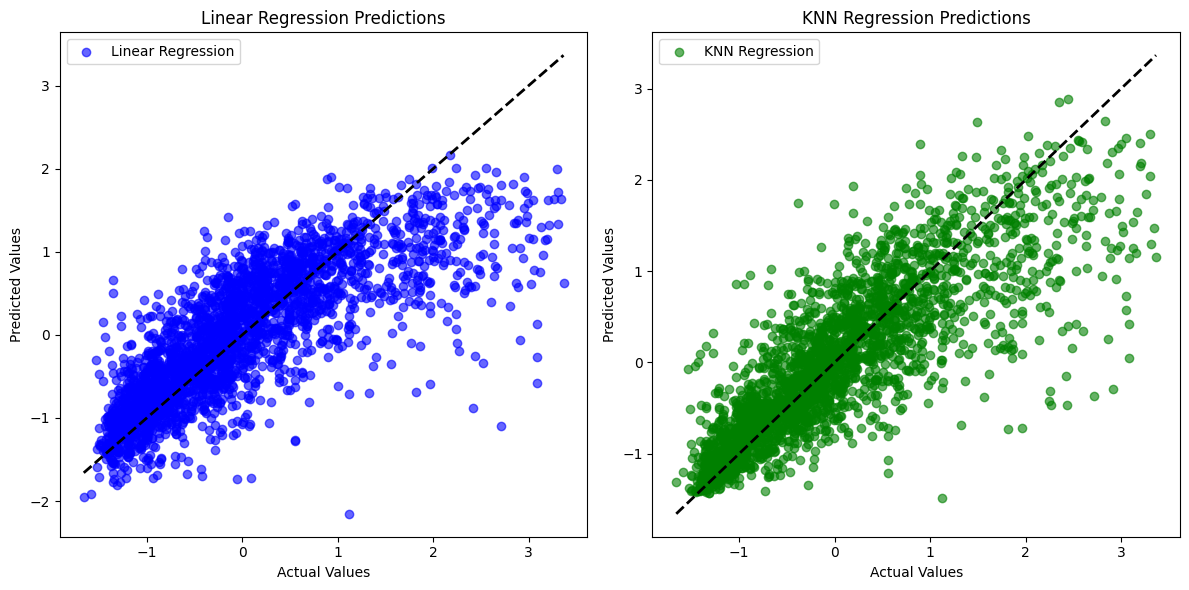

In [215]:
# Plot predictions vs actual values
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.6, color='blue', label="Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Predictions")
plt.legend()

# KNN Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, alpha=0.6, color='green', label="KNN Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression Predictions")
plt.legend()

plt.tight_layout()
plt.show()


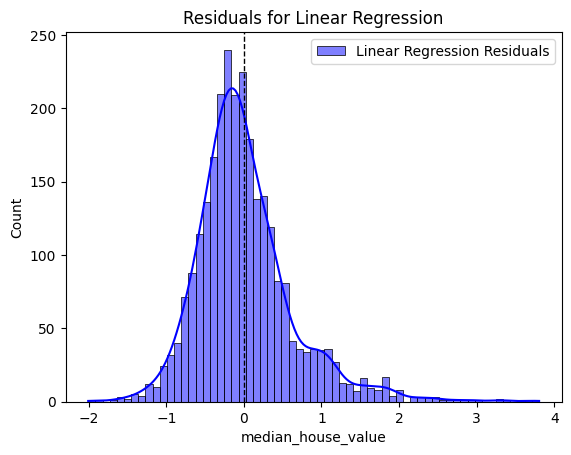

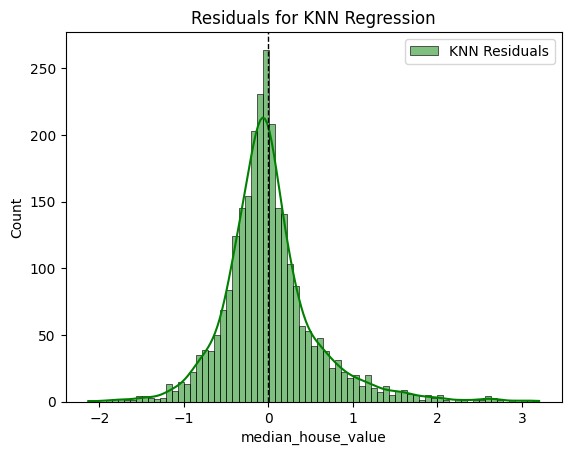

In [216]:
# Residuals for Linear Regression
residuals_lin = y_test - y_pred_lin
sns.histplot(residuals_lin, kde=True, color="blue", label="Linear Regression Residuals")
plt.axvline(0, color='k', linestyle='--', lw=1)
plt.legend()
plt.title("Residuals for Linear Regression")
plt.show()

# Residuals for KNN Regression
residuals_knn = y_test - y_pred_knn
sns.histplot(residuals_knn, kde=True, color="green", label="KNN Residuals")
plt.axvline(0, color='k', linestyle='--', lw=1)
plt.legend()
plt.title("Residuals for KNN Regression")
plt.show()


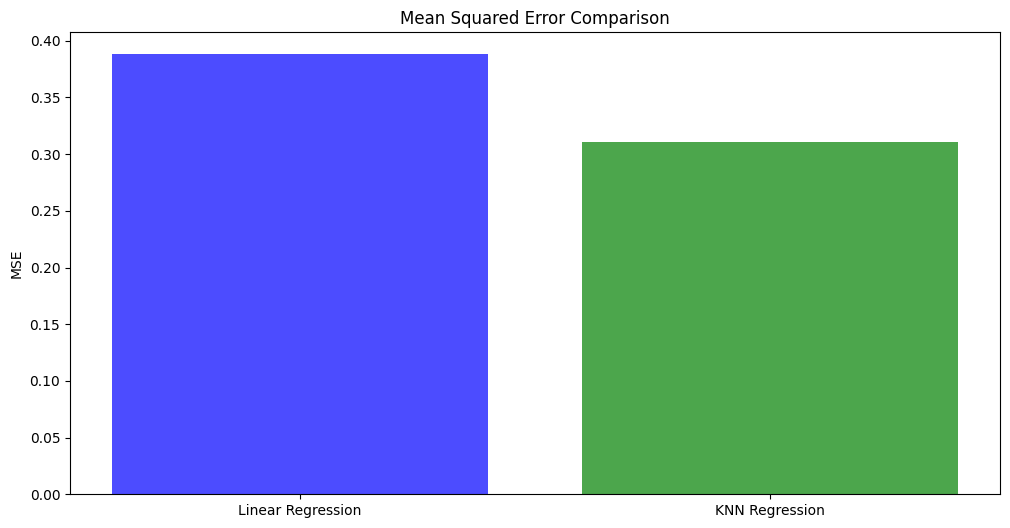

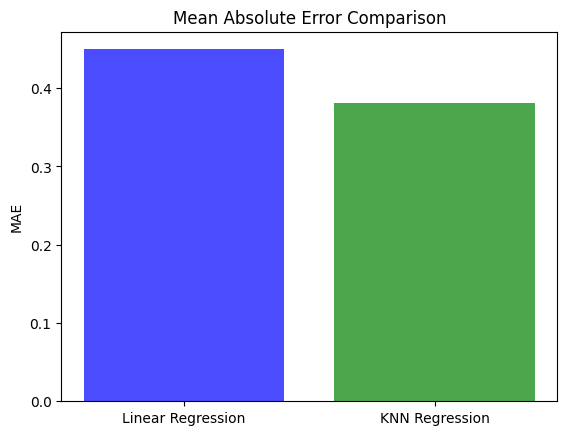

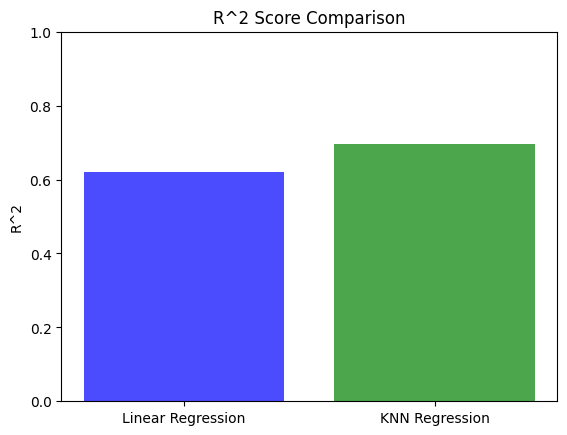

In [217]:
import matplotlib.pyplot as plt

# Metrics
models = ['Linear Regression', 'KNN Regression']
mse_values = [mse_lin, mse_knn]
mae_values = [mae_lin, mae_knn]
r2_values = [r2_lin, r2_knn]

# Plot MSE
plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color=['blue', 'green'], alpha=0.7)
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')
plt.show()

# Plot MAE
plt.bar(models, mae_values, color=['blue', 'green'], alpha=0.7)
plt.title('Mean Absolute Error Comparison')
plt.ylabel('MAE')
plt.show()

# Plot R^2
plt.bar(models, r2_values, color=['blue', 'green'], alpha=0.7)
plt.title('R^2 Score Comparison')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.show()
